# Clustering with a Gaussian Mixture Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

import pandas as pd
import numpy as np


from sklearn import datasets
from sklearn import mixture
from sklearn import manifold

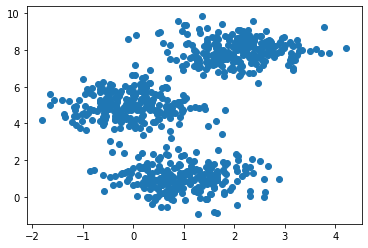

In [2]:
data, labels_true = datasets.make_blobs(n_samples=750, centers=[[1,1],[0,5],[2,8]], cluster_std=0.7,
                            random_state=0)


plt.scatter(data[:,0], data[:,1])

df = pd.DataFrame(data, columns=['X', 'Y'])

<ipython-input-1-50abd40fd442>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-50abd40fd442>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))


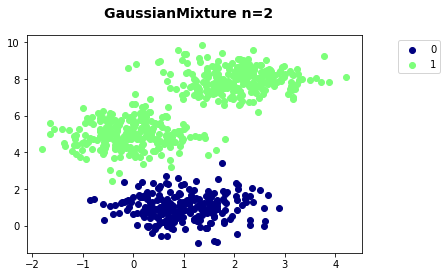

In [3]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(data)
label = gmm.predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('GaussianMixture n=2', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))

    
plt.legend(bbox_to_anchor=(1.25, 1))

<ipython-input-1-dca5d9e42d7e>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-dca5d9e42d7e>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-dca5d9e42d7e>

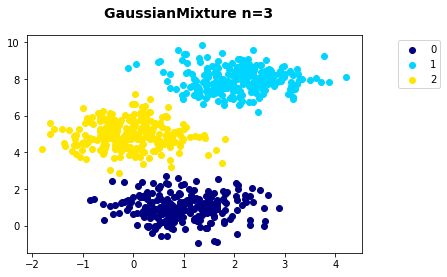

In [4]:
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(data)
label = gmm.predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('GaussianMixture n=3', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))

    
plt.legend(bbox_to_anchor=(1.25, 1))

<ipython-input-1-751e3b5efc6a>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-751e3b5efc6a>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-751e3b5efc6a>

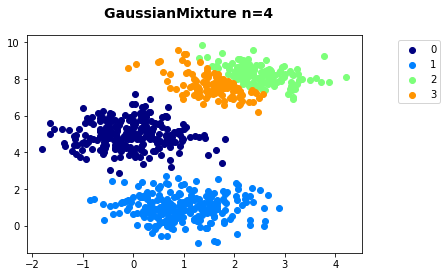

In [5]:
gmm = mixture.GaussianMixture(n_components=4)
gmm.fit(data)
label = gmm.predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('GaussianMixture n=4', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=clusters[i], color=plt.cm.jet(np.float(i) / len(np.unique(label))))

    
plt.legend(bbox_to_anchor=(1.25, 1))

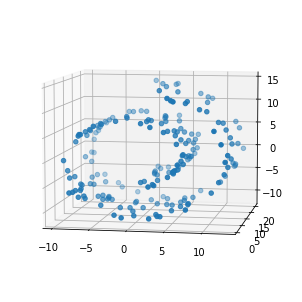

In [6]:
data, t = datasets.make_swiss_roll(n_samples=200, noise=0.1, random_state=0)

df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])


fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

ax.scatter(df.X, df.Y, df.Z, 'o')

<ipython-input-1-4771f016da0e>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-4771f016da0e>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))


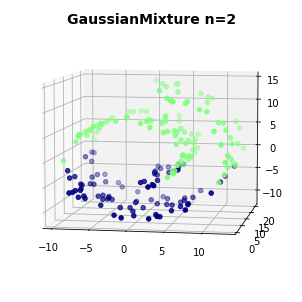

In [7]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(data)
label = gmm.predict(data)

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('GaussianMixture n=2', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))

<ipython-input-1-67866ccd2154>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-67866ccd2154>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-67866ccd2154>:15: DeprecationWarning: `np

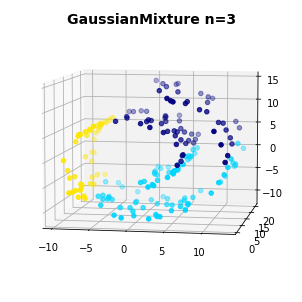

In [8]:
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(data)
label = gmm.predict(data)

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('GaussianMixture n=3', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))

<ipython-input-1-8082239f191f>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-8082239f191f>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-8082239f191f>:15: DeprecationWarning: `np

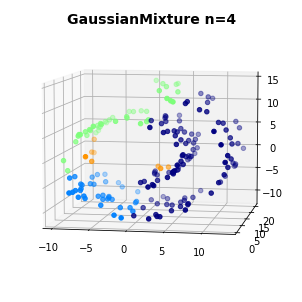

In [9]:
gmm = mixture.GaussianMixture(n_components=4)
gmm.fit(data)
label = gmm.predict(data)

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('GaussianMixture n=4', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))

<ipython-input-1-0b2abda36dd3>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-0b2abda36dd3>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))
<ipython-input-1-0b2abda36dd3>:15: DeprecationWarning: `np

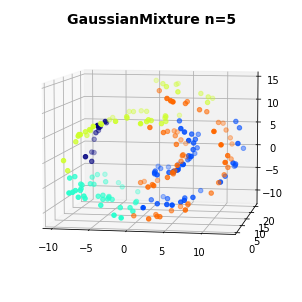

In [10]:
gmm = mixture.GaussianMixture(n_components=5)
gmm.fit(data)
label = gmm.predict(data)

df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
fig.suptitle('GaussianMixture n=5', fontsize=14, fontweight='bold')

for l in np.unique(label):
    
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 
               'o', color=plt.cm.jet(np.float(l) / len(np.unique(label))))